In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/content/insurance.csv')
df.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


In [3]:
df.shape

(1338, 7)

# Problem Statement:
- We have medical expenses/charges based on different input features like age,bmi,smoker...

In [4]:
df['charges']

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [6]:
# check for NaN
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
df.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [9]:
# Convert Category to numeric
df['sex'] = df['sex'].map({'female':0,'male':1})
df['smoker'] = df['smoker'].map({'no':0,'yes':1})
df['region'] = df['region'].map({'southwest':0, 'southeast':1, 'northwest':2, 'northeast':3})

In [10]:
df[:2]

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.90,0,1,0,16884.9240
1,18,1,33.77,1,0,1,1725.5523


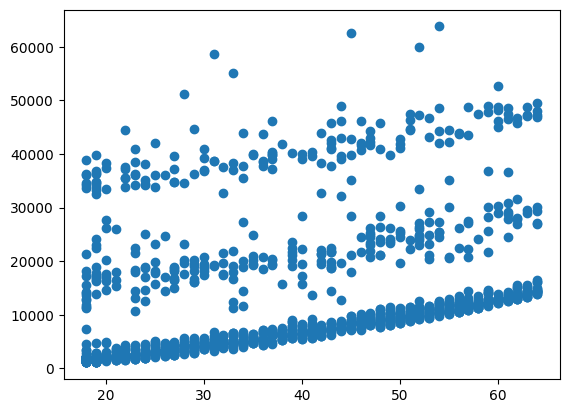

In [11]:
import matplotlib.pyplot as plt
plt.scatter(df.age,df.charges)

<Axes: >

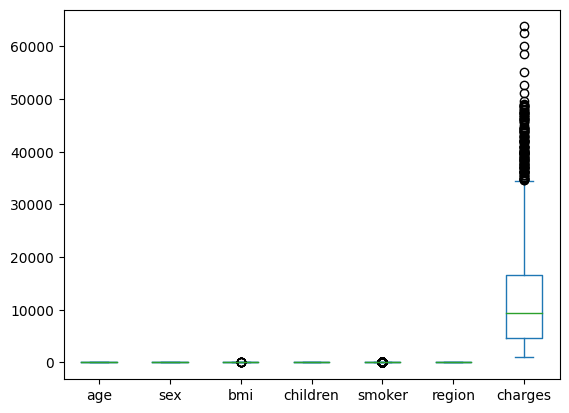

In [12]:
df.plot(kind='box')

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
sex,1338.0,0.505232,0.500160,0.0000,0.00000,1.000,1.000000,1.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
smoker,1338.0,0.204783,0.403694,0.0000,0.00000,0.000,0.000000,1.00000
region,1338.0,1.484305,1.104885,0.0000,1.00000,1.000,2.000000,3.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [15]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [16]:
from scipy import stats

# Assuming df is your DataFrame
# Create a new DataFrame to store data without outliers
new_df = df.copy()

# Define columns containing numerical data
numerical_columns = ['age', 'bmi', 'children', 'charges']

# Calculate z-scores for numerical columns
z_scores = stats.zscore(df[numerical_columns])

# Define a threshold for outlier detection (e.g., z-score > 3 or < -3)
threshold = 3

# Find and remove rows with outliers
outlier_indices = (z_scores > threshold).any(axis=1)
new_df = new_df[~outlier_indices]

# Reset index of the new DataFrame
new_df.reset_index(drop=True, inplace=True)

# Now new_df contains data without outliers

In [17]:
new_df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.90,0,1,0,16884.9240
1,18,1,33.77,1,0,1,1725.5523


In [18]:
new_df.shape

(1309, 7)

<Axes: >

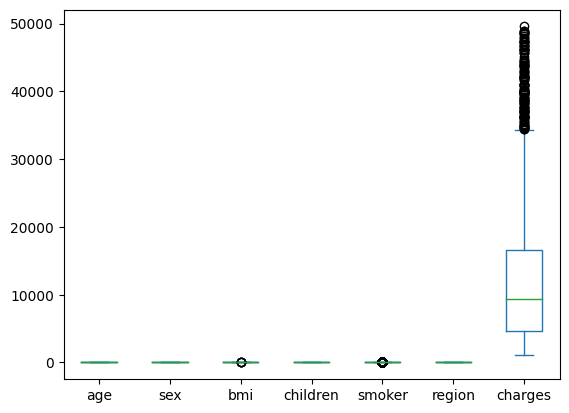

In [19]:
new_df.plot(kind='box')

In [21]:
# split data
X = new_df.iloc[:,:-1]
X[:2]

,age,sex,bmi,children,smoker,region
0,19,0,27.90,0,1,0
1,18,1,33.77,1,0,1


In [22]:
y = new_df['charges']
y[:2]

0    16884.9240
1     1725.5523
Name: charges, dtype: float64

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2)

In [25]:
# create a model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [26]:
model.fit(X_train,y_train)
model.score(X_train,y_train)

0.7552335723196099

In [28]:
# prediction
y_pred = model.predict(X_test)
y_pred #predicted

array([ 4136.021783  , 36448.5219409 ,  7512.56260822,  5461.4421756 ,
        4185.00735332, 11456.20260981,  3395.18460678,  8309.33264407,
        9190.5671422 , 10595.51784246, 26807.24630177,  2322.74824221,
       11945.49996736,  9478.66687546, 17286.40120331,  4540.8879002 ,
        9104.69134399,  5006.87429225, 11896.6793544 ,  4175.2315514 ,
        6881.23558716, 28303.44194172,  7304.46575041,  8372.05963246,
        2751.11941321,  3727.86745281, 15737.20091355, 16242.37706798,
        8302.35670633,  2835.09939899,  4511.28634132,  8185.68975159,
       13957.95327894, 11488.78646258,  3215.89029905, 10361.4426417 ,
        5182.21948815,  5638.91045326, 36698.75397525,  9069.1556711 ,
       26910.44246776,  1449.27673063, 14375.47785655, 34783.62508942,
       11930.98485041,  6351.71159892,  7197.74491118,  3881.76693087,
       11697.82843388,  7502.75113119, 12527.83092114,  4789.12634126,
       15096.5243523 , 35203.49906058,  3331.94393876, 10325.99592195,
      

In [30]:
y_test.values #converts series data to array

array([ 3756.6216 , 43921.1837 ,  5327.40025,  4237.12655,  4185.0979 ,
       12323.936  ,  2250.8352 ,  7421.19455, 27117.99378,  8116.26885,
       34166.273  ,  1875.344  ,  8527.532  ,  4762.329  , 14418.2804 ,
       20177.67113, 12032.326  ,  2473.3341 , 19496.71917,  2055.3249 ,
        2755.02095, 19521.9682 ,  6059.173  ,  6406.4107 ,  4827.90495,
        2719.27975, 14474.675  , 12981.3457 ,  6186.127  ,  3484.331  ,
        1646.4297 ,  6457.8434 , 13880.949  ,  7162.0122 , 23082.95533,
        8413.46305,  4661.28635,  4260.744  , 44641.1974 , 10791.96   ,
       17496.306  ,  1252.407  , 33471.97189, 27037.9141 , 14451.83515,
       24671.66334,  5148.5526 ,  4719.73655, 10231.4999 ,  7046.7222 ,
       10370.91255,  4234.927  , 12347.172  , 41999.52   ,  2205.9808 ,
        3994.1778 ,  2045.68525,  3732.6251 ,  4428.88785,  2913.569  ,
       12829.4551 ,  7518.02535,  7512.267  ,  5934.3798 , 10435.06525,
       11566.30055, 14254.6082 ,  2927.0647 ,  3077.0955 ,  4433

In [31]:
# error = actual - predicted
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

ValueError: continuous is not supported

# Error Measurement: MAE, MSE, RMSE
# Performance Measurement: Goodness of model: r2_score,adjusted_r2_score [0,1]

In [35]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score


In [33]:
# MAE
print('MAE:',mean_absolute_error(y_test,y_pred))

MAE: 4166.939080236173


In [36]:
# MSE
print('MSE:',mean_squared_error(y_test,y_pred))

MSE: 36051506.95521031


In [37]:
# RMSE
import numpy as np
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE: 6004.290712083344


In [38]:
# check model performance
r2_score(y_test,y_pred)*100

74.33853298699606

In [39]:
def adjusted_r2_score(y_true, y_pred, n_samples, n_features):
    #from sklearn.metrics import r2_score

    # Calculate R-squared
    r2 = r2_score(y_true, y_pred)

    # Calculate adjusted R-squared
    adjusted_r2 = 1 - ((1 - r2) * (n_samples - 1) / (n_samples - n_features - 1))

    return adjusted_r2

# Assuming y_test contains the true target values and y_pred contains the predicted target values
# Calculate the number of samples and features
n_samples = len(y_test)
n_features = X_test.shape[1]  # Assuming X_test is your feature matrix

# Calculate adjusted R-squared score
adjusted_r2 = adjusted_r2_score(y_test, y_pred, n_samples, n_features)

print("Adjusted R-squared score:", adjusted_r2)


Adjusted R-squared score: 0.7373473376316068


In [ ]:
# r2_score vs adjusted
#